In [2]:
import pickle
with open('/kaggle/input/pre-processamentob/x_orig_mod_medianfilter.pkl', 'rb') as f:
    X = pickle.load(f)
    
with open('/kaggle/input/pre-processamentob/y_orig_mod.pkl', 'rb') as f:
    Y = pickle.load(f)

In [3]:
import numpy as np
#Y = Y.astype(np.float32)

In [4]:
'''import cv2
import numpy as np
from tensorflow.image import resize

# Supondo que X seja uma lista de imagens coloridas.
X_resized = np.array([resize(image, [100, 100]) for image in X])
#imagens_cinza = np.array([cv2.cvtColor(image.astype('uint8'), cv2.COLOR_BGR2GRAY) for image in X_resized])

def converter_para_rgb(imagens_cinza):
    imagens_rgb = np.stack((imagens_cinza,) * 3, axis=-1)
    return imagens_rgb

imagens_rgba = converter_para_rgb(imagens_cinza)



imagens_rgba[0].shape
#X = preprocess_input(imagens_rgba)

X = X_resized
X.shape


# Convertendo a lista em um array NumPy
X = np.array(X)

SyntaxError: incomplete input (4073730990.py, line 1)

In [5]:
print(np.min(X))
print(np.max(X))
X.shape

0
255


(9947, 100, 100, 3)

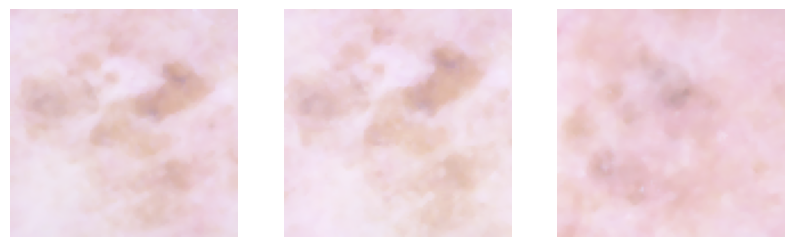

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [8]:
from tensorflow.keras.applications.inception_v3 import preprocess_input  
X = preprocess_input(X)

2024-07-31 16:57:00.867988: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 16:57:00.868087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 16:57:00.980168: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
print(np.min(X))
print(np.max(X))
X.shape

-1.0
1.0


(9947, 100, 100, 3)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [11]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0: 6304, 1: 1653}
Distribuição no conjunto de teste
{0: 1562, 1: 428}


In [12]:
'''import os
import cv2
import albumentations as A
from skimage.io import imread, imsave
from pathlib import Path

# transformações
import albumentations as A

transformacoes = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=40, p=1),
    A.HorizontalFlip(p=0.5),
])



novas = 10

index = 0
labels = []
x_train = []

for arquivo in X_train:
    imagem = arquivo
    holder = Y_train[index]
    index += 1
    for i in range(novas):
        imagem_transformada = transformacoes(image=imagem)['image']
        labels.append(holder)
        x_train.append(imagem_transformada)
        
import numpy as np


X_train = np.array(x_train)  
Y_train = np.array(labels)  
'''
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [13]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0: 6304, 1: 6612}
Distribuição no conjunto de teste
{0: 1562, 1: 428}


In [14]:
# Criando o objeto StratifiedKFold para 3 folds
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dicionário para armazenar os dados de treino de cada fold
folds = {}

# Dividindo os dados em folds
for i, (train_index, _) in enumerate(kfold.split(X_train, Y_train)):
    folds[f'x_train_{i+1}'] = X_train[train_index]
    folds[f'y_train_{i+1}'] = Y_train[train_index]

# Agora você tem x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3 armazenados no dicionário `folds`
x_train_1, y_train_1 = folds['x_train_1'], folds['y_train_1']
x_train_2, y_train_2 = folds['x_train_2'], folds['y_train_2']
x_train_3, y_train_3 = folds['x_train_3'], folds['y_train_3']

In [22]:
import numpy as np

unique, counts = np.unique(y_train_1, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no FOLD 1")
print(ocorrencias)

unique, counts = np.unique(y_train_2, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 2")
print(ocorrencias)

unique, counts = np.unique(y_train_3, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 3")
print(ocorrencias)

Distribuição no FOLD 1
{0: 4202, 1: 4408}
Distribuição no FOLD 2
{0: 4203, 1: 4408}
Distribuição no FOLD 3
{0: 4203, 1: 4408}


In [15]:
print(np.min(X_train))
print(np.max(X_train))
X_train.shape

-1.0
1.0


(12916, 100, 100, 3)

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

def create_InceptionV3():
    base_model = InceptionV3(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [17]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.regularizers import l2

scores = []
tempo = []
historys = []
metricas_por_fold = []
melhor_model = None
melhor_f1_score = 0

if(True):
    start_time = time.time()
    tf.keras.backend.clear_session()
    
    n_splits = 3
    hist = []
    holder = []
    metricas_fold = []
    
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
    
    i = 0
    for train_idx, val_idx in kfold.split(X_train, Y_train):
        tf.keras.backend.clear_session()
        early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='min', restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-5)
        modelo = create_InceptionV3()
        X_train_fold, Y_train_fold = X_train[train_idx], Y_train[train_idx]
        X_val_fold, Y_val_fold = X_train[val_idx], Y_train[val_idx]
        
        history = modelo.fit(X_train_fold, Y_train_fold, epochs=30, validation_data=(X_val_fold, Y_val_fold), callbacks=[early_stopping, reduce_lr])
        holder.append(modelo.evaluate(X_val_fold, Y_val_fold, verbose=0))

        # Previsão e cálculo das métricas para o conjunto de validação
        previsoes_val = modelo.predict(X_val_fold)
        previsoes_binarias_val = [1 if x > 0.5 else 0 for x in previsoes_val]

        # Relatório de Classificação para o conjunto de validação
        relatorio_dict = classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"], output_dict=True)
        precision_val = relatorio_dict['macro avg']['precision']
        recall_val = relatorio_dict['macro avg']['recall']
        f1_val = relatorio_dict['macro avg']['f1-score']
        
        # Calcular AUC-ROC
        auc_roc_val = roc_auc_score(Y_val_fold, previsoes_val)
        
        print("Relatório de Classificação (Validação):\n", classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"]))
        print(f"F1: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, AUC-ROC: {auc_roc_val:.4f}")
        metricas_fold.append((f1_val, recall_val, precision_val, auc_roc_val))
        
        # Verificar se este é o melhor modelo com base no F1-score
        if f1_val > melhor_f1_score:
            melhor_f1_score = f1_val
            melhor_model = modelo 
            bf = i
        i += 1
        del modelo

    # Guardar histórico e métricas
    hist.append(history)
    historys.append(hist)
    metricas_por_fold.append(metricas_fold)
    
    end_time = time.time()
    tempo.append(end_time - start_time)
    scores.append(holder)

# Exibir as métricas por fold e por fase
print(metricas_por_fold)



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/30
  7/270 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6022 - loss: 0.7938   

I0000 00:00:1722445123.550196     139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


270/270 ━━━━━━━━━━━━━━━━━━━━ 56s 121ms/step - accuracy: 0.6602 - loss: 0.6901 - val_accuracy: 0.7362 - val_loss: 0.5355 - learning_rate: 0.0010
Epoch 2/30
  7/270 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7488 - loss: 0.5428

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7265 - loss: 0.5526 - val_accuracy: 0.7425 - val_loss: 0.5238 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7498 - loss: 0.5097 - val_accuracy: 0.7536 - val_loss: 0.5045 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7612 - loss: 0.4903 - val_accuracy: 0.7480 - val_loss: 0.5143 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7700 - loss: 0.4737 - val_accuracy: 0.7541 - val_loss: 0.5143 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7798 - loss: 0.4527 - val_accuracy: 0.7506 - val_loss: 0.5075 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7921 - loss: 0.4395 - val_accuracy: 0.7538 - val_loss: 0.5029 - learning_rate: 0.0010
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8011 - loss: 0.4241 - val_

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7390 - loss: 0.5407 - val_accuracy: 0.7438 - val_loss: 0.5262 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7438 - loss: 0.5162 - val_accuracy: 0.7245 - val_loss: 0.5367 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7630 - loss: 0.4847 - val_accuracy: 0.7501 - val_loss: 0.5118 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7772 - loss: 0.4669 - val_accuracy: 0.7445 - val_loss: 0.5205 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7961 - loss: 0.4374 - val_accuracy: 0.7408 - val_loss: 0.5235 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.7946 - loss: 0.4362 - val_accuracy: 0.7533 - val_loss: 0.5099 - learning_rate: 0.0010
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8117 - loss: 0.4144 - val_

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.7278 - loss: 0.5450 - val_accuracy: 0.7261 - val_loss: 0.5446 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7475 - loss: 0.5146 - val_accuracy: 0.7510 - val_loss: 0.5108 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.7646 - loss: 0.4943 - val_accuracy: 0.7410 - val_loss: 0.5325 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7810 - loss: 0.4603 - val_accuracy: 0.7301 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.7875 - loss: 0.4453 - val_accuracy: 0.7352 - val_loss: 0.5223 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.7932 - loss: 0.4449 - val_accuracy: 0.7415 - val_loss: 0.5178 - learning_rate: 0.0010
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8005 - loss: 0.4264 - val_

In [18]:
model = melhor_model

In [19]:
Y_test = np.array(Y_test)

Forma de X_test: (1990, 100, 100, 3)
Forma de Y_test: (1990,)
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step
Forma das previsões: (1990, 1)
Acurácia no conjunto de teste: 0.7437185929648241
Matriz de Confusão:
 [[1185  377]
 [ 133  295]]


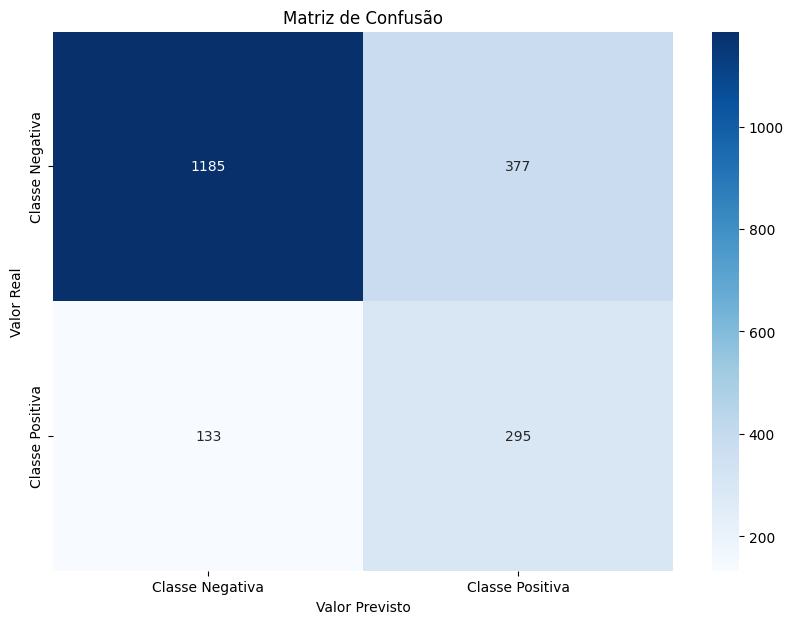

Relatório de Classificação:
               precision    recall  f1-score   support

    Classe 0       0.90      0.76      0.82      1562
    Classe 1       0.44      0.69      0.54       428

    accuracy                           0.74      1990
   macro avg       0.67      0.72      0.68      1990
weighted avg       0.80      0.74      0.76      1990



In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Certifique-se de que X_test e Y_test tenham a forma correta
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

# Verifique se X_test não está vazio
if X_test.size == 0:
    raise ValueError("X_test está vazio")

# Realize a predição
previsoes = model.predict(X_test)

# Verifique a forma das previsões
print(f"Forma das previsões: {previsoes.shape}")

# Converta as previsões para binário
previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

# Avaliação da acurácia
acuracia = accuracy_score(Y_test, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia}")

# Matriz de Confusão
matriz_confusao = confusion_matrix(Y_test, previsoes_binarias)
print("Matriz de Confusão:\n", matriz_confusao)

# Plot da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Relatório de Classificação
relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"])
print("Relatório de Classificação:\n", relatorio_classificacao)


In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def train_model(model, X_train, Y_train, EPOCHS=30):
    # Usando 'val_accuracy' em vez de 'val_acc'
    early_stop = EarlyStopping(monitor='val_accuracy', patience=10,verbose=1,
                               mode='max', restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5,
                                  verbose=1, mode='max', min_lr=1e-5)

    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size=16,
                        epochs=EPOCHS,
                        callbacks=[reduce_lr, early_stop])
    return history


In [24]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def create_inceptionv3_L():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    predictions = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Define o número de camadas a congelar
    # Neste caso, congelar as primeiras 249 camadas e treinar o restante
    for layer in base_model.layers[:249]:
        layer.trainable = False
    for layer in base_model.layers[249:]:
        layer.trainable = True

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model





melor fold = 3
OIBOMDIA 0
Epoch 1/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 58s 82ms/step - accuracy: 0.6414 - loss: 0.7315 - val_accuracy: 0.6732 - val_loss: 0.6099 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7090 - loss: 0.5751 - val_accuracy: 0.7185 - val_loss: 0.5595 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7346 - loss: 0.5224 - val_accuracy: 0.7145 - val_loss: 0.5537 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7511 - loss: 0.5079 - val_accuracy: 0.7348 - val_loss: 0.5505 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7675 - loss: 0.4835 - val_accuracy: 0.7179 - val_loss: 0.5438 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7805 - loss: 0.4586 - val_accuracy: 0.7284 - val_loss: 0.5607 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - 

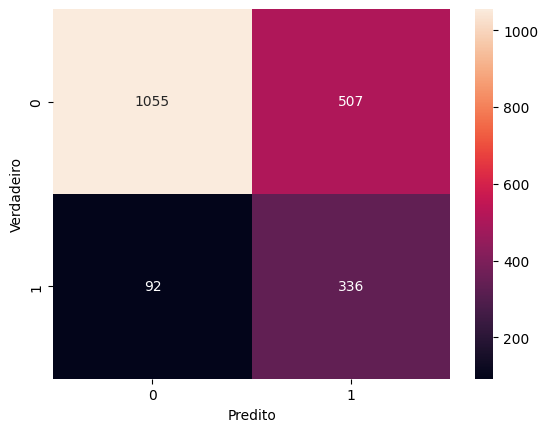

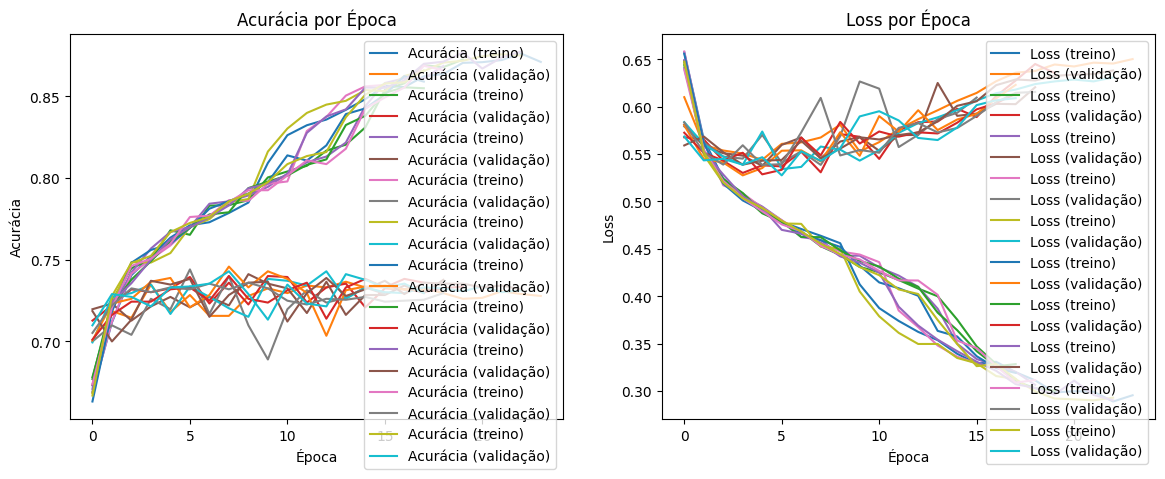

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []
if(bf==0):
    treinox = x_train_1
    treinoy = y_train_1
    print("melor fold = 1")
elif(bf==1):
    treinox = x_train_2
    treinoy = y_train_2
    print("melor fold = 2")
else:
    treinox = x_train_3
    treinoy = y_train_3
    print("melor fold = 3")

for i in range(10):
    print("OIBOMDIA",i)
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, treinox, treinoy, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão : {precisao_classe_1}")
    print(f"Recall : {recall_classe_1}")
    print(f"F1-Score : {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
#model.save_weights('/kaggle/working/VGG-16.weights.h5')